<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%206/Reproduce%20SKLearn%20Code/4_Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 6 Spectral Clustering

In [1]:
# Membuat data
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

Code di atas bertujuan untuk membuat data gambar berisi beberapa lingkaran dan mengubahnya menjadi grafik untuk keperluan clustering. Langkah-langkah yang dilakukan dalam code tersebut adalah sebagai berikut:

1. Menggunakan modul NumPy untuk membuat sebuah matriks berukuran 100x100 yang merepresentasikan gambar.

2. Mendefinisikan posisi dan radius dari empat lingkaran.

3. Menggunakan persamaan lingkaran untuk menentukan piksel mana yang berada di dalam lingkaran, sehingga membentuk empat array boolean circle1, circle2, circle3, dan circle4.

4. Menambahkan keempat array boolean tersebut untuk membuat gambar yang berisi beberapa lingkaran.

5. Mengkonversi gambar yang dihasilkan menjadi tipe data boolean dengan menganggap nilai piksel yang bernilai True sebagai bagian dari lingkaran dan False sebagai bagian luar lingkaran.

6. Menggunakan fungsi img_to_graph dari modul sklearn.feature_extraction.image untuk mengubah gambar menjadi grafik, di mana piksel-piksel dalam gambar dianggap sebagai simpul-simpul dalam grafik, dan keterhubungan antara piksel-piksel tersebut didefinisikan berdasarkan keterhubungan spasialnya.

7. Menyesuaikan bobot grafik untuk persiapan proses clustering dengan memanipulasi bobot grafik menggunakan exponential dari bobot grafik standar.

8. Menjalankan algoritma clustering, dalam hal ini menggunakan Spectral Clustering dari modul sklearn.cluster, untuk mengelompokkan piksel-piksel dalam gambar ke dalam beberapa cluster.

9. Menampilkan gambar asli yang berisi beberapa lingkaran dan gambar hasil clustering di mana warna setiap piksel merepresentasikan cluster yang dihasilkan.

Jadi, secara keseluruhan, code tersebut membuat data gambar berisi beberapa lingkaran, mengubahnya menjadi grafik, melakukan clustering menggunakan algoritma Spectral Clustering, dan menampilkan hasil clustering dalam bentuk gambar.

In [2]:
# Visualisasi Lingkaran
img = circle1 + circle2 + circle3 + circle4

mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)


Code di atas bertujuan untuk melakukan visualisasi terhadap lingkaran yang telah dibuat sebelumnya. Langkah-langkah yang dilakukan adalah sebagai berikut:

1. Menggabungkan keempat array boolean circle1, circle2, circle3, dan circle4 menjadi satu array img. Dalam operasi ini, nilai piksel yang berada di dalam lingkaran akan dianggap bernilai True (1), sedangkan piksel di luar lingkaran akan dianggap bernilai False (0).

2. Mengubah array img menjadi tipe data boolean dengan menggunakan metode astype(bool). Hal ini dilakukan untuk membuat mask atau area di mana lingkaran berada.

3. Mengubah tipe data array img menjadi float dengan menggunakan metode astype(float). Hal ini dilakukan agar nilai piksel yang berada di dalam lingkaran bisa diberi nilai float, yang akan berguna dalam langkah berikutnya.

4. Menambahkan noise acak ke dalam gambar dengan menggunakan fungsi np.random.randn() untuk menghasilkan angka-angka acak dari distribusi normal standar, kemudian dikalikan dengan faktor 0.2 dan ditambahkan ke dalam array img. Ini dilakukan untuk memberi efek variasi kecil pada intensitas piksel dalam lingkaran.

Dengan langkah-langkah di atas, kita dapat menghasilkan gambar yang menampilkan lingkaran-lingkaran dengan sedikit variasi intensitas warna di dalamnya, mirip dengan gambar yang dihasilkan dari kamera dengan sedikit noise.

In [3]:
# Mengubah gambar menjadi grafik
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

Dengan menggunakan fungsi img_to_graph dari modul sklearn.feature_extraction.image, gambar diubah menjadi grafik. Selanjutnya, bobot grafik disesuaikan untuk persiapan proses clustering dengan mengubahnya menjadi eksponensial dari bobot grafik standar.

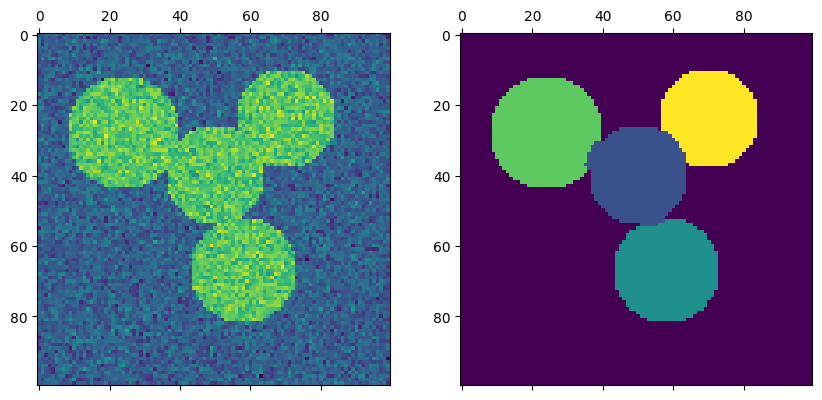

In [4]:
# Visualisasi Spectral Clustering
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

Output yang akan ditampilkan adalah dua gambar yang disusun dalam satu jendela plot:

1. Gambar Asli: Gambar pertama (axs[0]) menampilkan gambar asli yang berisi lingkaran. Warna pada gambar ini mewakili intensitas piksel yang dihasilkan dari tambahan noise acak. Lingkaran-lingkaran yang telah dibuat sebelumnya terlihat dengan jelas di dalam gambar ini.

2. Hasil Clustering: Gambar kedua (axs[1]) menampilkan hasil dari proses clustering menggunakan algoritma Spectral Clustering. Setiap piksel dalam gambar ini diberi warna berdasarkan label klaster yang diberikan oleh algoritma clustering. Piksel-piksel yang berada dalam satu klaster akan memiliki warna yang sama. Label -1 menunjukkan piksel yang tidak termasuk dalam lingkaran (berada di luar mask).

Dengan visualisasi ini, kita dapat melihat bagaimana algoritma clustering membagi-bagi piksel dalam gambar ke dalam beberapa klaster berdasarkan kesamaan karakteristiknya, dan bagaimana klaster tersebut berkorelasi dengan posisi dan bentuk lingkaran dalam gambar asli.